**Pneumonia Detection using Deep Learning**



**Introduction**

Pneumonia is a serious lung infection that can range from mild to life-threatening, particularly in infants, elderly individuals, and those with weak immune systems. Chest X-rays are a common diagnostic tool, but manual interpretation can be time-consuming and prone to error. With the rise of deep learning, it is now possible to automate pneumonia detection with high accuracy.

In this notebook, we build and evaluate a deep learning model to classify chest X-ray images as either *Normal* , *Bacterial Pneumonia* and *Viral Pneumonia*

**Dataset**

The dataset consists of chest X‑ray images divided into two categories:

* Normal: Healthy lungs

* Pneumonia: Lungs with pneumonia infection

* This dataset is publicly available on Kaggle - Chest X‑Ray Images (Pneumonia); *link: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia*.

* The dataset is split into:

* Training set: Used to train the model

* Validation set: Used to tune hyperparameters

* Test set: Used for final evaluation


PREPARING DATA

In [50]:
import os
import shutil

dirs = os.listdir("Datasets/chest_xray")
dirs

['test', 'train', 'val']

In [51]:
for dir in dirs: 
    os.mkdir(f"Datasets/chest_xray/{dir}/BACTERIAL_PNEUMONIA") if not os.path.exists(f"Datasets/chest_xray/{dir}/BACTERIAL_PNEUMONIA") else None
    os.mkdir(f"Datasets/chest_xray/{dir}/VIRAL_PNEUMONIA") if not os.path.exists(f"Datasets/chest_xray/{dir}/VIRAL_PNEUMONIA") else None

In [52]:
for dir in dirs:
    directory = f"Datasets/chest_xray/{dir}"
    pneumonia_dir = os.path.join(directory, "PNEUMONIA")
    if os.path.exists(pneumonia_dir):
        for file in os.listdir(pneumonia_dir):
            if "bacteria" in file:
                dest = os.path.join(directory, "BACTERIAL_PNEUMONIA", file)
                if not os.path.exists(dest):
                    shutil.move(os.path.join(pneumonia_dir, file), dest)
            elif "virus" in file:
                dest = os.path.join(directory, "VIRAL_PNEUMONIA", file)
                if not os.path.exists(dest):
                    shutil.move(os.path.join(pneumonia_dir, file), dest)
            else:
                pass

In [53]:
os.listdir("Datasets/chest_xray/train/BACTERIAL_PNEUMONIA")

['person1006_bacteria_2937.jpeg',
 'person1007_bacteria_2938.jpeg',
 'person1008_bacteria_2939.jpeg',
 'person1010_bacteria_2941.jpeg',
 'person1011_bacteria_2942.jpeg',
 'person1012_bacteria_2943.jpeg',
 'person1014_bacteria_2945.jpeg',
 'person1016_bacteria_2947.jpeg',
 'person1017_bacteria_2948.jpeg',
 'person1018_bacteria_2949.jpeg',
 'person1019_bacteria_2950.jpeg',
 'person1020_bacteria_2951.jpeg',
 'person1022_bacteria_2953.jpeg',
 'person1024_bacteria_2955.jpeg',
 'person1026_bacteria_2957.jpeg',
 'person1028_bacteria_2959.jpeg',
 'person1028_bacteria_2960.jpeg',
 'person1029_bacteria_2961.jpeg',
 'person1031_bacteria_2963.jpeg',
 'person1031_bacteria_2964.jpeg',
 'person1033_bacteria_2966.jpeg',
 'person1034_bacteria_2968.jpeg',
 'person1035_bacteria_2969.jpeg',
 'person1036_bacteria_2970.jpeg',
 'person1037_bacteria_2971.jpeg',
 'person1038_bacteria_2972.jpeg',
 'person1040_bacteria_2974.jpeg',
 'person1041_bacteria_2975.jpeg',
 'person1043_bacteria_2977.jpeg',
 'person1044_b

In [54]:
os.listdir("Datasets/chest_xray/train/VIRAL_PNEUMONIA")

['person1008_virus_1691.jpeg',
 'person1009_virus_1694.jpeg',
 'person100_virus_184.jpeg',
 'person1010_virus_1695.jpeg',
 'person1015_virus_1701.jpeg',
 'person1015_virus_1702.jpeg',
 'person1016_virus_1704.jpeg',
 'person1018_virus_1706.jpeg',
 'person1019_virus_1707.jpeg',
 'person1019_virus_1708.jpeg',
 'person101_virus_187.jpeg',
 'person101_virus_188.jpeg',
 'person1020_virus_1710.jpeg',
 'person1021_virus_1711.jpeg',
 'person1023_virus_1714.jpeg',
 'person1024_virus_1716.jpeg',
 'person1026_virus_1718.jpeg',
 'person1029_virus_1721.jpeg',
 'person102_virus_189.jpeg',
 'person1030_virus_1722.jpeg',
 'person1031_virus_1723.jpeg',
 'person1034_virus_1728.jpeg',
 'person1035_virus_1729.jpeg',
 'person1036_virus_1730.jpeg',
 'person1038_virus_1733.jpeg',
 'person103_virus_190.jpeg',
 'person1040_virus_1735.jpeg',
 'person1041_virus_1736.jpeg',
 'person1043_virus_1738.jpeg',
 'person1044_virus_1740.jpeg',
 'person1045_virus_1741.jpeg',
 'person1046_virus_1742.jpeg',
 'person1048_virus

In [55]:
os.listdir("Datasets/chest_xray/train/PNEUMONIA") if os.path.exists("Datasets/chest_xray/train/PNEUMONIA") else None

In [56]:
for dir in dirs: 
    directory = os.path.join("Datasets/chest_xray", dir, "PNEUMONIA")
    if os.path.exists(directory):
        shutil.rmtree(directory)
        print(f"Removed directory: {directory}")
    else:
        print(f"Directory does not exist: {directory}")

Directory does not exist: Datasets/chest_xray/test/PNEUMONIA
Directory does not exist: Datasets/chest_xray/train/PNEUMONIA
Directory does not exist: Datasets/chest_xray/val/PNEUMONIA


**Data Preprocessing**

Before training, the images undergo preprocessing to ensure consistency and improve model performance:

* Resizing: All images resized to a fixed dimension (e.g., 150×150 or 224×224).

* Normalization: Pixel values scaled between 0 and 1.

* Data Augmentation: Applied to reduce overfitting and increase model generalization. Common techniques:

* Random rotation

* Horizontal flipping

* Zoom

* Shifts and shear transformations


In [57]:
import tensorflow as tf
from keras.preprocessing import image_dataset_from_directory

DIRECTORY = "Datasets/chest_xray/"

train_dataset = image_dataset_from_directory(
    os.path.join(DIRECTORY, "train"),
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=123,
)

validation_dataset = image_dataset_from_directory(
    os.path.join(DIRECTORY, "val"),
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=123,
)

test_dataset = image_dataset_from_directory(
    os.path.join(DIRECTORY, "test"),
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=123,
)


Found 5216 files belonging to 3 classes.
Found 16 files belonging to 3 classes.
Found 16 files belonging to 3 classes.
Found 624 files belonging to 3 classes.
Found 624 files belonging to 3 classes.


In [58]:
from keras import layers
from keras.models import Sequential
import tensorflow as tf

# Enhanced data augmentation pipeline for better generalization
data_augmentation = Sequential([
    layers.Input(shape=(224, 224, 3)),    
    layers.RandomFlip("horizontal"),           
    layers.RandomRotation(0.1),                 
    layers.RandomZoom(0.1),                     
    layers.RandomContrast(0.2),               
    layers.RandomBrightness(0.1),              
    layers.RandomTranslation(0.1, 0.1),       
], name="data_augmentation")

In [59]:
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)
validation_dataset = validation_dataset.map(
    lambda x, y: (data_augmentation(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)
test_dataset = test_dataset.map(
    lambda x, y: (data_augmentation(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

In [60]:
random_batch = train_dataset.take(1)

for images, labels in random_batch:
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)
print("Number of classes:", labels.shape[1])

Image shape: (32, 224, 224, 3)
Label shape: (32, 3)
Number of classes: 3
Number of classes: 3


(-0.5, 223.5, 223.5, -0.5)

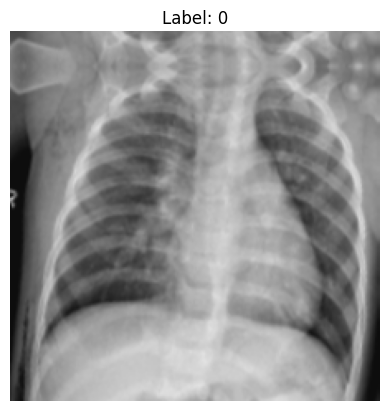

In [64]:
import random

idx = random.randint(0, len(images) - 1)
import matplotlib.pyplot as plt
plt.imshow(images[idx].numpy().astype("uint8"))
plt.title(f"Label: {labels[idx].numpy().argmax()}")
plt.axis("off")

In [25]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

**Model Architecture**

We use a Convolutional Neural Network (CNN), which is well‑suited for image classification tasks. The architecture includes:

* EfficientNetB0 as a transfer learning base model.

* Convolutional layers (Conv2D): Extract features like edges, textures, and shapes.

* MaxPooling layers: Reduce dimensionality while preserving important features.

* Dropout layers: Prevent overfitting by randomly deactivating neurons during training.

* Dense layers: Perform final classification.

Optionally, a transfer learning approach (e.g., using VGG16, ResNet, or MobileNet) can be used for better accuracy.

A summary of the model architecture is displayed after definition.

In [26]:
from keras import mixed_precision

policy = mixed_precision.Policy("mixed_float16")
mixed_precision.set_global_policy(policy)

In [33]:
from keras.applications import EfficientNetB0

base_model = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling=None
)

base_model.trainable = False

In [34]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_7[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2

In [35]:
for layer in base_model.layers:
    print(layer.dtype_policy)

<Policy "float32">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Policy "mixed_float16">
<Polic

In [36]:
from keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras import Input
import keras

inputs = Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)  
x = GlobalAveragePooling2D()(x)  
x = BatchNormalization()(x)     
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)              
x = BatchNormalization()(x)      
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)            
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)          
x = Dense(3)(x)  

outputs = layers.Activation('softmax', dtype='float32')(x) 

model = Model(inputs=inputs, outputs=outputs, name="pneumonia_classifier")


optimizer = keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
model.compile(
    optimizer=optimizer, 
    loss='categorical_crossentropy', 
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)

In [37]:
model.summary()

Model: "pneumonia_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_4 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 256)               327936    
                                              

**Training the Model**

* Optimizer: AdamW

* Loss Function: Categorical Crossentropy

* Metric: Accuracy, Precision, Recall

* Fine Tuning: Last 20 layers

* Imbalanced class weights adjusted

In [38]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Compute class weights for handling class imbalance
all_labels = []
for _, labels in train_dataset:
    all_labels.extend(np.argmax(labels.numpy(), axis=1))
all_labels = np.array(all_labels)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")


callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'Models/best_model_pneumonia.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

epochs = 15  # Increased epochs with early stopping
history1 = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=validation_dataset,  # Use validation dataset instead of test
    steps_per_epoch=len(train_dataset),
    validation_steps=len(validation_dataset),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Class weights: {0: 0.6872200263504611, 1: 1.2965448670146658, 2: 1.2926889714993803}
Epoch 1/15
Epoch 1/15


2025-08-19 19:11:42.093142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-08-19 19:11:42.526237: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-08-19 19:11:42.526237: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-08-19 19:11:44.808244: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7d65ac005420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-19 19:11:44.808265: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-08-19 19:11:44.813144: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-19 19:11:44.881291: I ./tensorflow/compiler/jit/

163/163 [==============================] - ETA: 0s - loss: 0.7906 - accuracy: 0.6131 - precision: 0.6537 - recall: 0.5491
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to Models/best_model_pneumonia.h5

Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to Models/best_model_pneumonia.h5
163/163 [==============================] - 18s 60ms/step - loss: 0.7906 - accuracy: 0.6131 - precision: 0.6537 - recall: 0.5491 - val_loss: 1.0481 - val_accuracy: 0.4375 - val_precision: 0.4545 - val_recall: 0.3125 - lr: 0.0010


/home/rajat/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 0.6507 - accuracy: 0.6923 - precision: 0.7233 - recall: 0.6501
Epoch 2: val_accuracy improved from 0.43750 to 0.56250, saving model to Models/best_model_pneumonia.h5

Epoch 2: val_accuracy improved from 0.43750 to 0.56250, saving model to Models/best_model_pneumonia.h5
163/163 [==============================] - 11s 62ms/step - loss: 0.6507 - accuracy: 0.6923 - precision: 0.7233 - recall: 0.6501 - val_loss: 0.8838 - val_accuracy: 0.5625 - val_precision: 0.5000 - val_recall: 0.4375 - lr: 0.0010
Epoch 3/15
Epoch 3/15
162/163 [============================>.] - ETA: 0s - loss: 0.6238 - accuracy: 0.7039 - precision: 0.7307 - recall: 0.6622
Epoch 3: val_accuracy did not improve from 0.56250
163/163 [==============================] - 11s 62ms/step - loss: 0.6244 - accuracy: 0.7032 - precision: 0.7300 - recall: 0.6610 - val_loss: 1.2931 - val_accuracy: 0.3125 - val_precision: 0.3571 - val_recall: 0.3125 - lr: 0.0010

Epoch 3:

In [39]:
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=keras.optimizers.AdamW(learning_rate=1e-5, weight_decay=1e-5), 
    loss='categorical_crossentropy', 
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
)

print(f"Total trainable parameters: {model.count_params()}")
print(f"Trainable layers: {sum(1 for layer in model.layers if layer.trainable)}")

Total trainable parameters: 4424998
Trainable layers: 12


In [40]:
fine_tune_callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.3,
        patience=3,
        min_lr=1e-8,
        verbose=1
    ),
    ModelCheckpoint(
        'Models/fine_tuned_pneumonia.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

fine_tune_epochs = 10
history_fine_tune = model.fit(
    train_dataset,
    epochs=len(history1.history['loss']) + fine_tune_epochs,
    initial_epoch=len(history1.history['loss']),
    validation_data=validation_dataset,
    steps_per_epoch=len(train_dataset),
    validation_steps=len(validation_dataset),
    class_weight=class_weight_dict,
    callbacks=fine_tune_callbacks,
    verbose=1
)

Epoch 13/22
163/163 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.7525 - precision: 0.7714 - recall: 0.7260
Epoch 13: val_accuracy improved from -inf to 0.56250, saving model to Models/fine_tuned_pneumonia.h5

Epoch 13: val_accuracy improved from -inf to 0.56250, saving model to Models/fine_tuned_pneumonia.h5
163/163 [==============================] - 24s 114ms/step - loss: 0.5492 - accuracy: 0.7525 - precision: 0.7714 - recall: 0.7260 - val_loss: 0.9172 - val_accuracy: 0.5625 - val_precision: 0.5333 - val_recall: 0.5000 - lr: 1.0000e-05
Epoch 14/22
Epoch 14/22
163/163 [==============================] - ETA: 0s - loss: 0.5495 - accuracy: 0.7483 - precision: 0.7669 - recall: 0.7195
Epoch 14: val_accuracy did not improve from 0.56250
163/163 [==============================] - 19s 112ms/step - loss: 0.5495 - accuracy: 0.7483 - precision: 0.7669 - recall: 0.7195 - val_loss: 1.5240 - val_accuracy: 0.3750 - val_precision: 0.3846 - val_recall: 0.3125 - lr: 1.0000e-05

In [41]:
model.evaluate(test_dataset)

20/20 [==============================] - 2s 35ms/step - loss: 0.6591 - accuracy: 0.7933 - precision: 0.8383 - recall: 0.7644


[0.6591446995735168,
 0.7932692170143127,
 0.8383128046989441,
 0.7644230723381042]

In [42]:
total_acc = history1.history['accuracy'] + history_fine_tune.history['accuracy'] 
total_val_acc = history1.history['val_accuracy'] + history_fine_tune.history['val_accuracy'] 

total_loss = history1.history['loss'] + history_fine_tune.history['loss'] 
total_val_loss = history1.history['val_loss'] + history_fine_tune.history['val_loss']


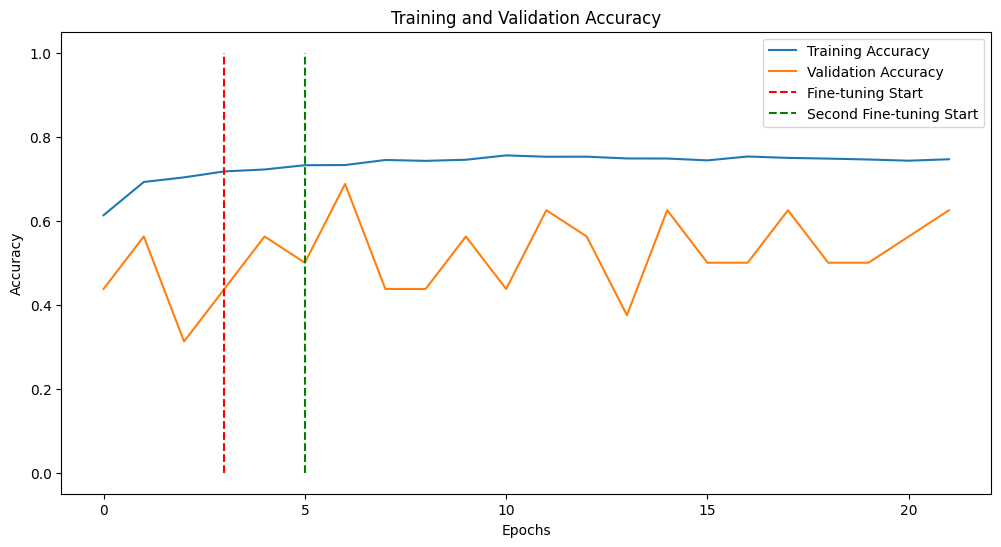

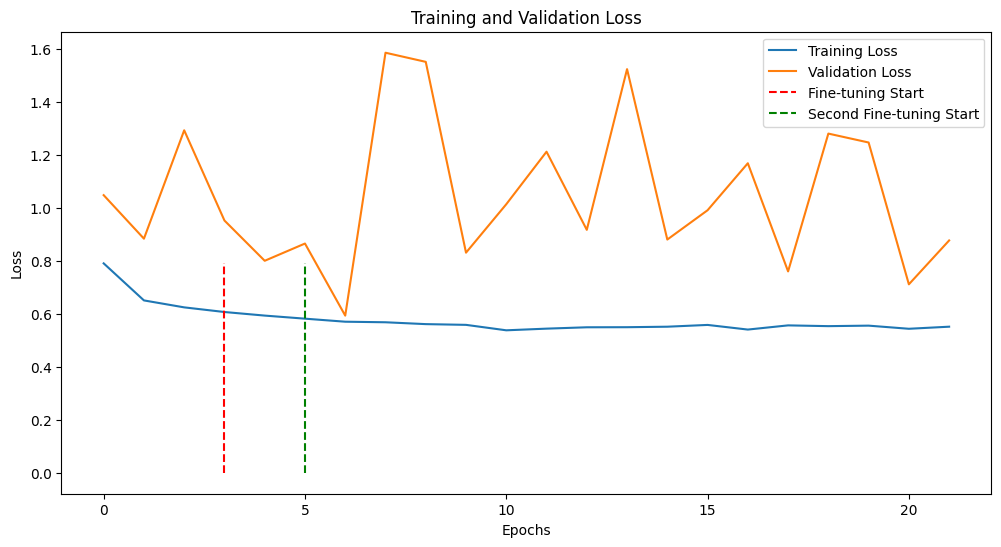

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(total_acc)), total_acc, label='Training Accuracy')
plt.plot(range(len(total_val_acc)), total_val_acc, label='Validation Accuracy')
plt.plot([3, 3], [0, 1], 'r--', label='Fine-tuning Start')  
plt.plot([5, 5], [0, 1], 'g--', label='Second Fine-tuning Start')  
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(range(len(total_loss)), total_loss, label='Training Loss')
plt.plot(range(len(total_val_loss)), total_val_loss, label='Validation Loss')
plt.plot([3, 3], [0, max(total_loss)], 'r--', label='Fine-tuning Start')  
plt.plot([5, 5], [0, max(total_loss)], 'g--', label='Second Fine-tuning Start') 
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**Predictions**

The model was tested on a few sample chest X-ray images from the dataset. Predictions were compared with actual labels. The CNN correctly identified most pneumonia and normal cases, showing its effectiveness in real-world use.

In [44]:
import numpy as np
from sklearn.metrics import f1_score


print("Evaluating on test dataset...")
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(
    test_dataset, 
    verbose=1
)

print(f"\nTest Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


y_pred = []
y_true = []
prediction_probabilities = []

print("\nGenerating predictions...")
for x, y in test_dataset:
    pred_probs = model.predict(x, verbose=0)
    pred = np.argmax(pred_probs, axis=1)
    y_pred.extend(pred.tolist())
    y_true.extend(np.argmax(y.numpy(), axis=1).tolist())
    prediction_probabilities.extend(pred_probs.tolist())


f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"\nF1 Scores:")
print(f"Macro F1: {f1_macro:.4f}")
print(f"Weighted F1: {f1_weighted:.4f}")

Evaluating on test dataset...
20/20 [==============================] - 2s 36ms/step - loss: 0.6769 - accuracy: 0.7949 - precision: 0.8206 - recall: 0.7548

Test Results:
Test Loss: 0.6769
Test Accuracy: 0.7949
Test Precision: 0.8206
Test Recall: 0.7548

Generating predictions...

Test Results:
Test Loss: 0.6769
Test Accuracy: 0.7949
Test Precision: 0.8206
Test Recall: 0.7548

Generating predictions...

F1 Scores:
Macro F1: 0.7849
Weighted F1: 0.7969

F1 Scores:
Macro F1: 0.7849
Weighted F1: 0.7969


Average confidence for correct predictions: 0.7659
Average confidence for incorrect predictions: 0.6093


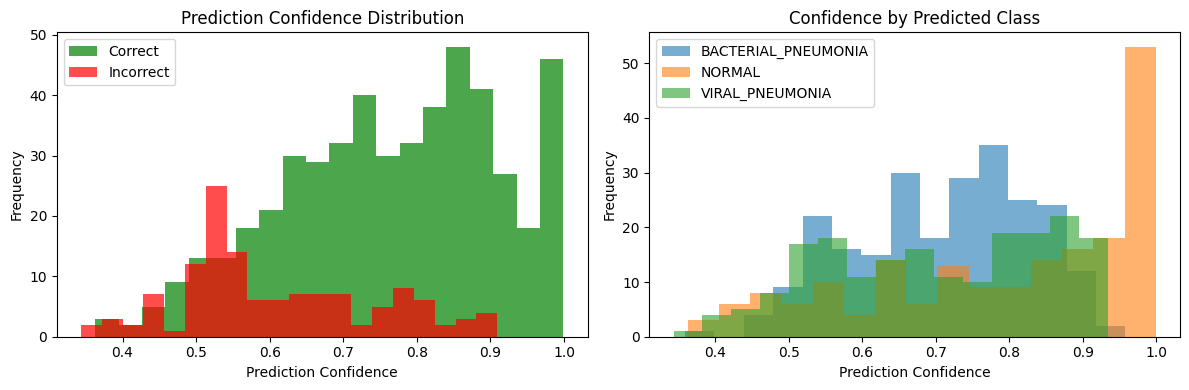


Detailed predictions and true labels:
Predictions: [0, 1, 0, 0, 2, 0, 0, 1, 1, 2]...
True labels: [0, 1, 0, 0, 0, 0, 0, 1, 1, 2]...


In [45]:
import matplotlib.pyplot as plt

prediction_probabilities = np.array(prediction_probabilities)
max_probabilities = np.max(prediction_probabilities, axis=1)
predicted_classes = np.array(y_pred)
true_classes = np.array(y_true)

correct_predictions = (predicted_classes == true_classes)
avg_confidence_correct = np.mean(max_probabilities[correct_predictions])
avg_confidence_incorrect = np.mean(max_probabilities[~correct_predictions])

print(f"Average confidence for correct predictions: {avg_confidence_correct:.4f}")
print(f"Average confidence for incorrect predictions: {avg_confidence_incorrect:.4f}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(max_probabilities[correct_predictions], bins=20, alpha=0.7, label='Correct', color='green')
plt.hist(max_probabilities[~correct_predictions], bins=20, alpha=0.7, label='Incorrect', color='red')
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Prediction Confidence Distribution')
plt.legend()

plt.subplot(1, 2, 2)
class_names = ['BACTERIAL_PNEUMONIA', 'NORMAL', 'VIRAL_PNEUMONIA']
for i, class_name in enumerate(class_names):
    class_confidences = max_probabilities[predicted_classes == i]
    plt.hist(class_confidences, bins=15, alpha=0.6, label=class_name)
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Confidence by Predicted Class')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nDetailed predictions and true labels:")
print(f"Predictions: {y_pred[:10]}...")
print(f"True labels: {y_true[:10]}...")

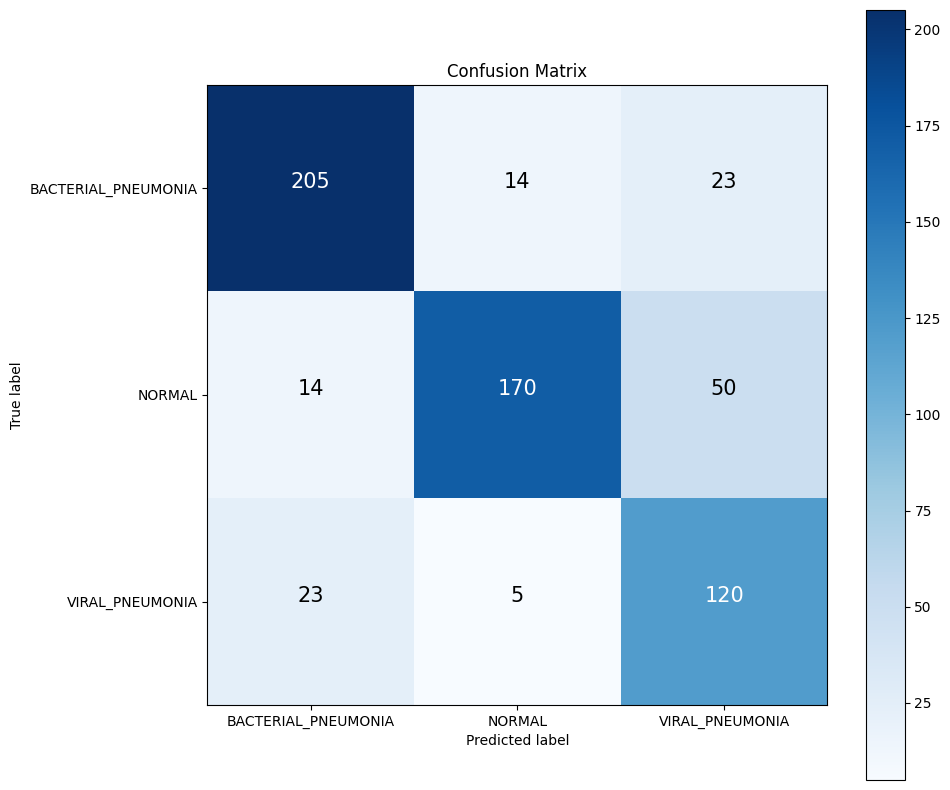

In [46]:
from helper_functions import make_confusion_matrix

# Convert y_true from one-hot encoded arrays to class indices

make_confusion_matrix(y_true, y_pred, classes=['BACTERIAL_PNEUMONIA', 'NORMAL', 'VIRAL_PNEUMONIA'])

Per-class Performance Analysis:

BACTERIAL_PNEUMONIA:
  Precision: 0.8471
  Recall:    0.8471
  F1-Score:  0.8471
  Support:   242

NORMAL:
  Precision: 0.8995
  Recall:    0.7265
  F1-Score:  0.8038
  Support:   234

VIRAL_PNEUMONIA:
  Precision: 0.6218
  Recall:    0.8108
  F1-Score:  0.7038
  Support:   148

AUC for BACTERIAL_PNEUMONIA: 0.9410

AUC for NORMAL: 0.9489

AUC for VIRAL_PNEUMONIA: 0.9048

Macro-averaged AUC: 0.9316


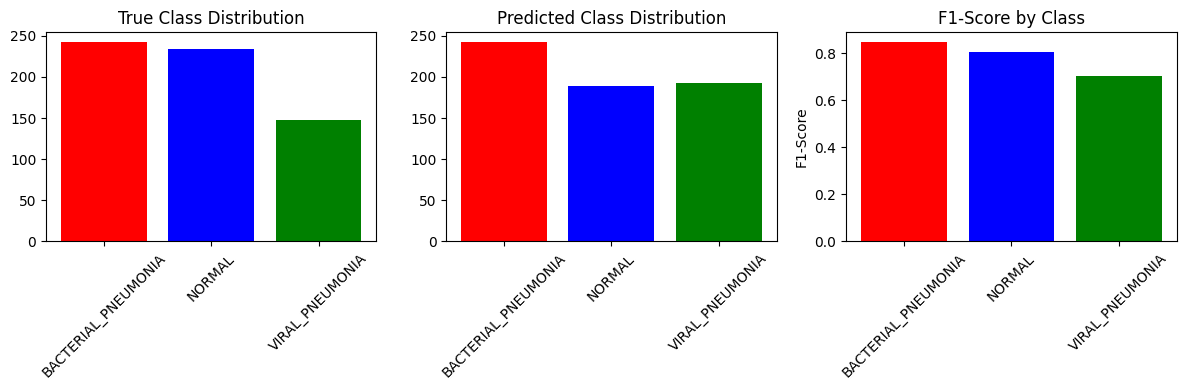

In [47]:
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

class_names = ['BACTERIAL_PNEUMONIA', 'NORMAL', 'VIRAL_PNEUMONIA']


precision, recall, f1, support = precision_recall_fscore_support(
    y_true, y_pred, average=None, labels=[0, 1, 2]
)

print("Per-class Performance Analysis:")
print("=" * 50)
for i, class_name in enumerate(class_names):
    print(f"\n{class_name}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1-Score:  {f1[i]:.4f}")
    print(f"  Support:   {support[i]}")


y_true_binary = label_binarize(y_true, classes=[0, 1, 2])
y_pred_probs = np.array(prediction_probabilities)

try:
    auc_scores = []
    for i in range(3):
        auc = roc_auc_score(y_true_binary[:, i], y_pred_probs[:, i])
        auc_scores.append(auc)
        print(f"\nAUC for {class_names[i]}: {auc:.4f}")
    
    macro_auc = np.mean(auc_scores)
    print(f"\nMacro-averaged AUC: {macro_auc:.4f}")
except Exception as e:
    print(f"Could not calculate AUC: {e}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
unique, counts = np.unique(y_true, return_counts=True)
plt.bar([class_names[i] for i in unique], counts, color=['red', 'blue', 'green'])
plt.title('True Class Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
plt.bar([class_names[i] for i in unique_pred], counts_pred, color=['red', 'blue', 'green'])
plt.title('Predicted Class Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.bar(class_names, f1, color=['red', 'blue', 'green'])
plt.title('F1-Score by Class')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['BACTERIAL_PNEUMONIA', 'NORMAL', 'VIRAL_PNEUMONIA']))

                     precision    recall  f1-score   support

BACTERIAL_PNEUMONIA       0.85      0.85      0.85       242
             NORMAL       0.90      0.73      0.80       234
    VIRAL_PNEUMONIA       0.62      0.81      0.70       148

           accuracy                           0.79       624
          macro avg       0.79      0.79      0.78       624
       weighted avg       0.81      0.79      0.80       624



In [49]:
import os
os.makedirs("Models", exist_ok=True)


model.save("Models/improved_pneumonia_classifier.h5")
print("Model saved successfully!")

performance_summary = {
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'f1_macro': f1_macro,
    'f1_weighted': f1_weighted,
    'class_performance': {
        class_names[i]: {
            'precision': precision[i],
            'recall': recall[i],
            'f1_score': f1[i],
            'support': support[i]
        } for i in range(len(class_names))
    }
}

print("\n" + "="*60)
print("FINAL MODEL PERFORMANCE SUMMARY")
print("="*60)
print(f"Overall Test Accuracy: {test_accuracy:.4f}")
print(f"Macro F1-Score: {f1_macro:.4f}")
print(f"Weighted F1-Score: {f1_weighted:.4f}")
print("\nPer-Class Performance:")
for class_name, metrics in performance_summary['class_performance'].items():
    print(f"{class_name}: F1={metrics['f1_score']:.4f}, Precision={metrics['precision']:.4f}, Recall={metrics['recall']:.4f}")
print("="*60)

Model saved successfully!

FINAL MODEL PERFORMANCE SUMMARY
Overall Test Accuracy: 0.7949
Macro F1-Score: 0.7849
Weighted F1-Score: 0.7969

Per-Class Performance:
BACTERIAL_PNEUMONIA: F1=0.8471, Precision=0.8471, Recall=0.8471
NORMAL: F1=0.8038, Precision=0.8995, Recall=0.7265
VIRAL_PNEUMONIA: F1=0.7038, Precision=0.6218, Recall=0.8108


/home/rajat/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
